## Exploratory data analysis - introduction to DataFrames

Have a go at this with a data file of your own with some real data. Most of the techniques here are generic enough that you can slightly tweak them to suit your dataset, but there may be exceptions. If you get a bit stuck then open the CSV file in some spreadsheet software to build up some fundamental understanding of the data before you proceed.

# Activity 1

In [1]:
import pandas as pd
# import csv

df = pd.read_csv("sample.csv")

# You could do this directly from a URL if you don't want to upload a file through Jupyter's upload tab e.g.

# data = pd.read_csv('https://someData.url')

# If you require authentication this will fail and you will have to use URLLib.


In [2]:
df.head(3)
#df[0:3]

,Name,Code,Level,Exam,Students,Average Grade
0,Interaction Design,CM3055,6,1.0,20,78
1,Agile Software Projects,CM2020,5,0.0,45,73
2,Computer Security,CM2025,5,1.0,55,79


In [3]:
#df.tail(3)
# You might want to pick some arbitrary slices to explore at more depth.
df[6:9]

,Name,Code,Level,Exam,Students,Average Grade
6,Discrete Maths,CM1020,4,1.0,95,61
7,How Computers Work,CM1030,4,NaN,150,92
8,Final Project,CM3070,6,0.0,5,53


In [4]:
df["Students"].mean()

70.55555555555556

In [5]:
df["Average Grade"].mean()

67.0

In [6]:
df["Average Grade"].std()

15.47578754054216

In [7]:
df["Students"].max()

150

In [8]:
df["Students"].min()

5

In [9]:
df["Students"].describe()

count      9.000000
mean      70.555556
std       56.813535
min        5.000000
25%       20.000000
50%       55.000000
75%      105.000000
max      150.000000
Name: Students, dtype: float64

In [10]:
df.shape

(9, 6)

In [11]:
df

,Name,Code,Level,Exam,Students,Average Grade
0,Interaction Design,CM3055,6,1.0,20,78
1,Agile Software Projects,CM2020,5,0.0,45,73
2,Computer Security,CM2025,5,1.0,55,79
3,Fundamentals of CS,CM1025,4,1.0,150,68
4,Machine Learning,CM1035,6,1.0,10,41
5,Computational Maths,CM1015,4,1.0,105,58
6,Discrete Maths,CM1020,4,1.0,95,61
7,How Computers Work,CM1030,4,NaN,150,92
8,Final Project,CM3070,6,0.0,5,53


In [12]:
df["Name"]

0         Interaction Design
1    Agile Software Projects
2          Computer Security
3         Fundamentals of CS
4           Machine Learning
5        Computational Maths
6             Discrete Maths
7         How Computers Work
8              Final Project
Name: Name, dtype: object

In [13]:
# An index isn't always necessary, so you might want to skip this step.

df.set_index("Code", inplace=True)

In [14]:
df

,Name,Level,Exam,Students,Average Grade
Code,,,,,
CM3055,Interaction Design,6,1.0,20,78
CM2020,Agile Software Projects,5,0.0,45,73
CM2025,Computer Security,5,1.0,55,79
CM1025,Fundamentals of CS,4,1.0,150,68
CM1035,Machine Learning,6,1.0,10,41
CM1015,Computational Maths,4,1.0,105,58
CM1020,Discrete Maths,4,1.0,95,61
CM1030,How Computers Work,4,NaN,150,92
CM3070,Final Project,6,0.0,5,53


In [15]:
# Try a few different sorts for your own dataset and see if you can identify some trends at a cursory level.
df.sort_values(by=['Level'], ascending=True)

,Name,Level,Exam,Students,Average Grade
Code,,,,,
CM1025,Fundamentals of CS,4,1.0,150,68
CM1015,Computational Maths,4,1.0,105,58
CM1020,Discrete Maths,4,1.0,95,61
CM1030,How Computers Work,4,NaN,150,92
CM2020,Agile Software Projects,5,0.0,45,73
CM2025,Computer Security,5,1.0,55,79
CM3055,Interaction Design,6,1.0,20,78
CM1035,Machine Learning,6,1.0,10,41
CM3070,Final Project,6,0.0,5,53


In [16]:
# The threshold values you set should be meaningful. The mean is a good starting point, but you might want 
# to explore other threshold values.
df[df["Students"] < 71]

,Name,Level,Exam,Students,Average Grade
Code,,,,,
CM3055,Interaction Design,6,1.0,20,78
CM2020,Agile Software Projects,5,0.0,45,73
CM2025,Computer Security,5,1.0,55,79
CM1035,Machine Learning,6,1.0,10,41
CM3070,Final Project,6,0.0,5,53


In [17]:
# Amalgamations of things can often yield the most interest insights. 
# Perhaps you have already identified a subset of the data and can work therein.
df.loc[(df['Students'] < 71) & (df['Exam'] ==  0)]

,Name,Level,Exam,Students,Average Grade
Code,,,,,
CM2020,Agile Software Projects,5,0.0,45,73
CM3070,Final Project,6,0.0,5,53


are student numbers and module levels related?

Text(0.5, 1.0, 'Level vs Students')

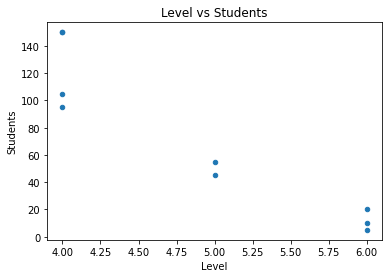

In [18]:
# You might want to play around with different parameters and/or colour schemes here
# https://pandas.pydata.org/pandas-docs/version/0.25.0/reference/api/pandas.DataFrame.plot.scatter.html
ax = df.plot.scatter(x = 'Level', y = 'Students')
ax.set_title('Level vs Students')

<AxesSubplot:xlabel='Level'>

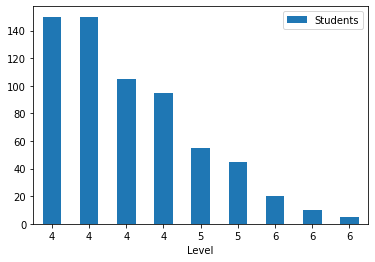

In [19]:
# 'As level of diff increases, student numbers decrease'
# I am sure you can come up with a more interesting hypothesis than Dr McGrath!
df.sort_values(by='Students', ascending=False).plot(kind="bar", rot=0, x = 'Level', y = 'Students')

In [20]:
# level 5
df2 = df.loc[(df['Level'] == 5)]
df2

,Name,Level,Exam,Students,Average Grade
Code,,,,,
CM2020,Agile Software Projects,5,0.0,45,73
CM2025,Computer Security,5,1.0,55,79


In [21]:
df2["Average Grade"].mean()

76.0

<AxesSubplot:xlabel='Students'>

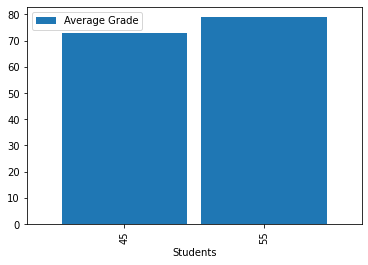

In [22]:
# pandas.DataFrame.plot
df2.plot.bar(width=0.9,x='Students',y="Average Grade")

<AxesSubplot:ylabel='Exam'>

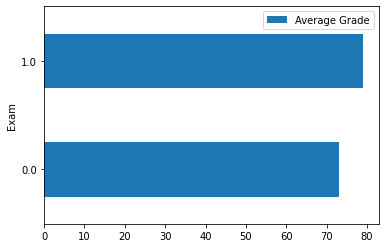

In [23]:
# Level 5, with an exam are harder than l5 with a coursework assignment
df2.sort_values(by='Students').plot(kind="barh", x="Exam", y="Average Grade")

this is true because [Dr McGrath] said so

# Activity 2

Write a program that works out which of the local authorities has the most polluted educational institution and 
which has the least polluted educational institution. 

Hint: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.max.html

You can use the London Datastore's dataset
[Air Quality Exposure Data](https://data.london.gov.uk/dataset/schools-and-educational-institutions-air-quality-exposure-data)
or a different dataset if you wish. 

If you want to try to apply more advanced statistical functions to the dataset then please do give it a go! You might for example want to explore the different data types

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dtypes.html

Are they correct or is there an issue with the mapping?

Perhaps you want to split your data into quantiles to further refine meaning.

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.quantile.html

In [24]:
# load the dataset
df_pollution = pd.read_excel('Schools_ParliamentaryConstituencies.xlsx', sheet_name='List of schools', header=3, usecols='B:M', index_col=0)
df_pollution.head(3)

,Local Authority name,Establisment name,Easting,Northing,Type of Establishment,Phase of education,NO2ug/m3 mean 2013,Above limit,Parliamentary Constituences,Establishment Status,Close Date
URN,,,,,,,,,,,
134154,Tower Hamlets,Courtauld Institute of Art,530773,180770,Higher Education Institutions,Not applicable,73.1,Yes,Cities of London and Westminster,Open,NaT
133910,Westminster,London School of Economics and Political Science,530778,181130,Higher Education Institutions,Not applicable,68.2,Yes,Cities of London and Westminster,Open,NaT
100529,Lambeth,DLD College London,530860,179614,Other Independent School,Not applicable,67.8,Yes,Vauxhall,Open,NaT


In [25]:
# get an overview of the pollution
df_pollution['NO2ug/m3 mean 2013'].describe()

count    3261.000000
mean       36.227262
std         7.012651
min        22.400000
25%        31.100000
50%        35.200000
75%        39.900000
max        73.100000
Name: NO2ug/m3 mean 2013, dtype: float64

In [26]:
df_sorted = df_pollution.sort_values(by='NO2ug/m3 mean 2013', ascending=False)[['Local Authority name', 'NO2ug/m3 mean 2013']]

# find the local authorities has the most polluted educational institution
df_sorted.head(1)

,Local Authority name,NO2ug/m3 mean 2013
URN,,
134154,Tower Hamlets,73.1


In [27]:
# find the local authorities has least polluted educational institution
df_sorted.tail(1)

,Local Authority name,NO2ug/m3 mean 2013
URN,,
142050,Havering,22.4


# Activity 3

Access an open data repository and find some historical data for the part of the world that you are in. 

Import the data to a DataFrame. Then calculate:

<ul>
    <li>min/max values from each column.</li>
    <li>a count of the NA/NaN values. There are a few ways to do this e.g. </li>
    <a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.isna.html">Is NA?</a>
<a href="https://numpy.org/doc/stable/reference/generated/numpy.isnan.html">Is NAN?</a>
    <li> Finally, find something <b>interesting</b> from the data.</li>
    
This requires you to understand the data and find an approach that explores this construct. Where is the missing 
data? How might this obscure your analysis? Can you think of a simple solution to overcome this problem of missing data?
    
Hint: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html
    
Sometimes dropping data can obscure the results. Imagine if we took all the 'zero' grades on a course and discarded them against the average. It would skew things in one direction or another depending on the choices we make!
    
(We will cover this at a greater level of depth in a later topic!)
    
As an example if you are working with weather data for instance, you might want to compute the Pearson correlation coefficient between the temperature and wind speed. Is it significant? What story can you tell with the data? Can 
you offer an interesting and insightful narrative?

## Births by Mother's Country of Birth in London

source: [https://data.london.gov.uk/dataset/births-by-mothers-country-of-birth-in-london](https://data.london.gov.uk/dataset/births-by-mothers-country-of-birth-in-london)

In [28]:
# import the libraries
import pandas as pd
import matplotlib.pyplot as plt

In [29]:
# load the dataset
df_mothers = pd.read_csv('births_by_mothers_country_of_birth_2001_to_2020.csv')
df_mothers.head()

,year,gss_code,usual_residence_of_mother,type,total_births_all,total_births_uk_mothers,total_births_overseas_mothers,overseas_mothers_total_EU,overseas_mothers_pre2004_EU_countries,overseas_mothers_post2004_EU_accession_countries,overseas_mothers_non_EU_europe,overseas_mothers_asia,overseas_mothers_africa,overseas_mothers_rest_of_world
0,2001,E92000001,ENGLAND,Country,563744,467536,96208,17632,14388,3244,5228,39147,20558,13643
1,2001,W92000004,WALES,Country,30616,29022,1594,430,380,50,58,682,246,178
2,2001,E12000001,NORTH EAST,Region,25949,24429,1520,324,284,40,72,768,231,125
3,2001,E12000002,NORTH WEST,Region,75201,67632,7569,1136,989,147,199,4743,936,555
4,2001,E12000003,YORKSHIRE AND THE HUMBER,Region,55625,49071,6554,860,733,127,173,4611,484,426


In [30]:
# get all the mothers in England
df_england = df_mothers.query('type == "Country" and usual_residence_of_mother == "ENGLAND"')

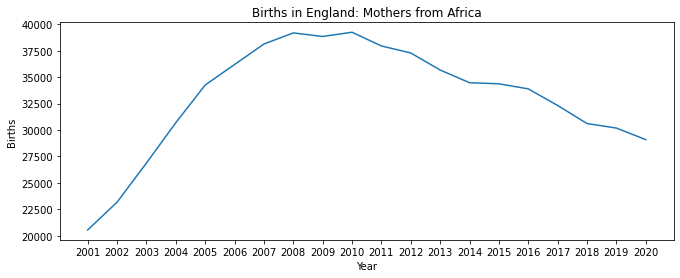

In [37]:
#plt.bar(df_england.year, df_england.total_births_all, label='All Births')
plt.figure(figsize=(11, 4))
plt.plot(df_england.year.astype(str), df_england.overseas_mothers_africa)
plt.xlabel('Year')
plt.ylabel('Births')
plt.title('Births in England: Mothers from Africa')
plt.show()

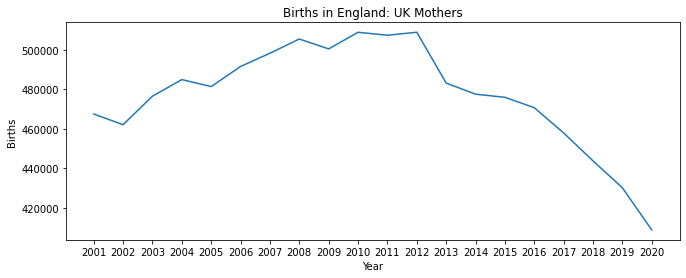

In [38]:
plt.figure(figsize=(11, 4))
plt.plot(df_england.year.astype(str), df_england.total_births_uk_mothers)
plt.xlabel('Year')
plt.ylabel('Births')
plt.title('Births in England: UK Mothers')
plt.show()